In [5]:
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
from sklearn.linear_model import LinearRegression
from statistics import mean
from tqdm import tqdm_notebook

In [6]:
ls ../../dataset/1000_iteration/maximum

ch_max_1000avg_10.csv  ch_max_1000avg_30.csv
ch_max_1000avg_20.csv  ch_max_1000avg_5.csv


In [7]:
def generateAngleMaximum(angleNumber, beamWidth):
    lowerBound = -beamWidth / 2
    upperBond = beamWidth / 2
    angles = np.random.uniform(lowerBound, upperBond, angleNumber)
    return angles


def angularValue(angleArray):
    sumOfCos = 0
    index = 1
    for i in angleArray:
        for j in angleArray[index:]:
            sumOfCos += np.cos(np.deg2rad(i - j))
        index += 1
    return sumOfCos


def generateChannelCoefficient(pathNumber, pathCoefficient, angles):
    channelCoefficient = np.square(pathCoefficient) * (
        pathNumber + (2 * angularValue(angles)))
    return channelCoefficient

In [8]:
'''List of used var.

Keywords var:
beamwidth [Hz]              --
iteration                   --
pathCoefficient (a)         --
pathNumber (N)              --
pathStart                   -- Path where iteration starts
pathSpacing                 -- Spacing between iterated path
currentIteration            -- Channel coefficient of a path for current iteration
channelCoefficientIterations -- A group of channel coefficient iterations for each path
channelCoefficientAverage   -- The average of 'channelCoefficientIterations' for each path
fileName                    --
'''

beamWidth = 0
iteration = 1
pathCoefficient = 1
pathNumber = 1000
pathStart = 50
pathSpacing = 50
fileName = 'ch_max_{}avg_{}.csv'.format(iteration, beamWidth)
currentIteration = []
channelCoefficientIterations = []
channelCoefficientAverage = []

In [9]:
print('Starting iterations!\nPath number: {}\nIteration: {}\nBeam width: {}'.
      format(pathNumber, iteration, beamWidth))
print(fileName)

for path in tqdm_notebook(np.arange(pathStart, pathNumber + 1, pathSpacing)):
    currentIteration = []
    for itr in np.arange(iteration):
        angles = generateAngleMaximum(path, beamWidth)
        channelCoefficient = generateChannelCoefficient(
            path, pathCoefficient, angles)
        currentIteration.append(channelCoefficient)
    channelCoefficientIterations.append(currentIteration)
    channelCoefficientAverage.append(mean(currentIteration))

Starting iterations!
Path number: 1000
Iteration: 1
Beam width: 0
ch_max_1avg_0.csv


In [10]:
channelCoefficientAverage

[2500.0,
 10000.0,
 22500.0,
 40000.0,
 62500.0,
 90000.0,
 122500.0,
 160000.0,
 202500.0,
 250000.0,
 302500.0,
 360000.0,
 422500.0,
 490000.0,
 562500.0,
 640000.0,
 722500.0,
 810000.0,
 902500.0,
 1000000.0]

In [6]:
np.savetxt(
    '../../dataset/1000_iteration/maximum/{}'.format(fileName),
    channelCoefficientAverage,
    fmt='%10.5f')

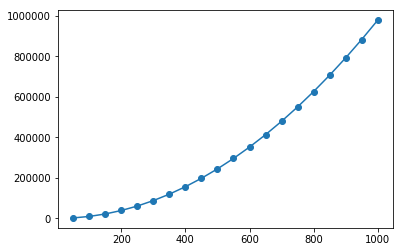

In [7]:
plt.plot(
    np.arange(pathStart, pathNumber + 1, pathSpacing),
    channelCoefficientAverage,
    marker='o')